In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Project Motivation
'''

1. Which languages saw the rise in their usage the most from 2019-2020?
2. Has the deciding factor 'Remote Work / Work from home' has increased over the years and due to the pandemic?
3. When did most people write their first line of code?
4. Which group of people use stackoverflow for their work the most?
5. What factors associate with high salary?

'''

# Import Libraries

In [73]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [58]:
# Import pandas profiling
!pip install pandas_profiling[notebook]
import pandas_profiling

# Load all the datasets

In [39]:
df_s02019_pub = pd.read_csv("/kaggle/input/st2019/survey_results_public.csv")
df_s02019_schema = pd.read_csv("/kaggle/input/st2019/survey_results_schema.csv")
df_s02020_pub = pd.read_csv("/kaggle/input/so2020/survey_results_public.csv")
df_s02020_schema = pd.read_csv("/kaggle/input/so2020/survey_results_schema.csv")

In [40]:
print('SO 2019 schema dataset ::: ', df_s02019_schema.shape)
print('SO 2020 schema dataset ::: ', df_s02020_schema.shape)

print('SO 2019 results dataset ::: ', df_s02019_pub.shape)
print('SO 2020 results dataset ::: ', df_s02020_pub.shape)

SO 2019 schema dataset :::  (85, 2)
SO 2020 schema dataset :::  (61, 2)
SO 2019 results dataset :::  (88883, 85)
SO 2020 results dataset :::  (64461, 61)


It seems like the number of questions being surveyed have reduced to more than 50% in two years (2018-2020) from 129 to 61 only.

In [30]:
df_s02019_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


In [31]:
df_s02020_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"


In [6]:
df_s02019_pub.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [9]:
df_s02020_pub.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [11]:
df_s02019_pub.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [13]:
df_s02020_pub.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


Drop Columns with more than 60% values missing

In [22]:
df_s02019_pub.columns[df_s02019_pub.isnull().sum()/df_s02019_pub.shape[0]*100>60]

Index([], dtype='object')

In [23]:
df_s02020_pub.columns[df_s02020_pub.isnull().sum()/df_s02020_pub.shape[0]*100>60]

Index([], dtype='object')

In [32]:
df_s02020_pub.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [34]:
df_s02020_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [35]:
new_df_s02020_pub = df_s02020_pub[['Age1stCode', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'SOVisitFreq', 'JobFactors', 'YearsCode', 'YearsCodePro']].copy()

In [46]:
new_df_s02020_pub.head(2)

,Age1stCode,LanguageWorkedWith,LanguageDesireNextYear,SOVisitFreq,JobFactors,YearsCode,YearsCodePro
0,13,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Multiple times per day,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",36,27
1,19,JavaScript;Swift,Python;Swift,Multiple times per day,NaN,7,4


In [48]:
new_df_s02020_pub.shape

(64461, 7)

In [36]:
new_df_s02019_pub = df_s02019_pub[['Age1stCode', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'SOVisitFreq', 'JobFactors', 'YearsCode', 'YearsCodePro']].copy()

In [47]:
new_df_s02019_pub.head(2)

,Age1stCode,LanguageWorkedWith,LanguageDesireNextYear,SOVisitFreq,JobFactors,YearsCode,YearsCodePro
0,10,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,A few times per month or weekly,NaN,4,NaN
1,17,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,Daily or almost daily,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with",NaN,NaN


In [49]:
new_df_s02019_pub.shape

(88883, 7)

In [44]:
def get_description(column_name, schema):
    """ This function shows specific question of each column
        
        Input:  schema - pandas dataframe with the schema of the developers survey
                column_name - string - the name of the column you would like to know about
        Output: description - string - the description of the column
    """
    description = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return description

In [45]:
get_description(new_df_s02020_pub.columns[3], df_s02020_schema)

'How frequently would you say you visit Stack Overflow?'

# Data Preparation

In [52]:
new_df_s02020_pub.isnull().sum()

Age1stCode                6561 
LanguageWorkedWith        7083 
LanguageDesireNextYear    10348
SOVisitFreq               7491 
JobFactors                15112
YearsCode                 6777 
YearsCodePro              18112
dtype: int64

In [54]:
new_df_s02020_pub.dtypes

Age1stCode                object
LanguageWorkedWith        object
LanguageDesireNextYear    object
SOVisitFreq               object
JobFactors                object
YearsCode                 object
YearsCodePro              object
dtype: object

In [51]:
new_df_s02019_pub.isnull().sum()

Age1stCode                1249 
LanguageWorkedWith        1314 
LanguageDesireNextYear    4795 
SOVisitFreq               620  
JobFactors                9512 
YearsCode                 945  
YearsCodePro              14552
dtype: int64

In [53]:
new_df_s02019_pub.dtypes

Age1stCode                object
LanguageWorkedWith        object
LanguageDesireNextYear    object
SOVisitFreq               object
JobFactors                object
YearsCode                 object
YearsCodePro              object
dtype: object

In [60]:
profile_2020 = pandas_profiling.ProfileReport(new_df_s02020_pub)

In [61]:
profile_2020.to_notebook_iframe()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [62]:
profile_2019 = pandas_profiling.ProfileReport(new_df_s02019_pub)

In [63]:
profile_2019.to_notebook_iframe()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [64]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

### 1. Which languages saw the rise in their usage the most from 2019-2020?

In [80]:
possible_vals = ['Assembly', 'Bash/Shell/PowerShell', 'C', 'C++', 'C#', 'Clojure', 'Dart', 'Elixir','F#', 'Go', 'HTML/CSS', 'Java', 'Javascript', 'Kotlin', 'Objective-C',
                'PHP', 'Python', 'R', 'Ruby', 'Rust', 'Scala', 'SQL', 'Swift', 'Typescript', 'VBA', 'WebAssembly']


In [95]:
curr_lang = new_df_s02019_pub['LanguageWorkedWith'].value_counts().reset_index()
curr_lang.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
print(curr_lang.head())
curr_lang19_df = total_count(curr_lang, 'language', 'count', possible_vals)

                                language  count
0  HTML/CSS;JavaScript;PHP;SQL            1483 
1  C#;HTML/CSS;JavaScript;SQL             1414 
2  HTML/CSS;JavaScript                    1247 
3  C#;HTML/CSS;JavaScript;SQL;TypeScript  990  
4  Java                                   934  


In [83]:
curr_lang19_df.head()

,language,count
2,C,71988
11,Java,70113
10,HTML/CSS,55466
20,SQL,47544
15,Python,36443


In [92]:
curr_lang = new_df_s02020_pub['LanguageWorkedWith'].value_counts().reset_index()
curr_lang.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
print(curr_lang.head())
curr_lang20_df = total_count(curr_lang, 'language', 'count', possible_vals)

                                language  count
0  HTML/CSS;JavaScript;PHP;SQL            1073 
1  HTML/CSS;JavaScript                    900  
2  C#;HTML/CSS;JavaScript;SQL             856  
3  C#;HTML/CSS;JavaScript;SQL;TypeScript  754  
4  HTML/CSS;JavaScript;TypeScript         697  


In [93]:
curr_lang20_df.head()

,language,count
2,C,46769
8,Java,45749
7,HTML/CSS,36181
17,SQL,31413
12,Python,25287


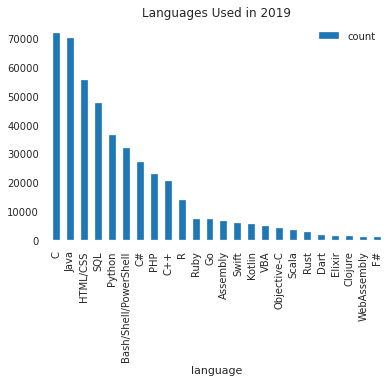

In [96]:
curr_lang19_df.set_index('language', inplace=True)
curr_lang19_df.plot(kind = 'bar')
plt.title("Languages Used in 2019");
plt.show()

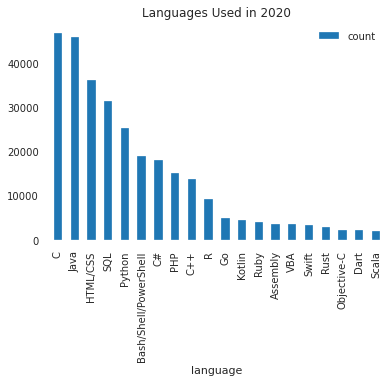

In [94]:
curr_lang20_df.set_index('language', inplace=True)
curr_lang20_df.plot(kind = 'bar')
plt.title("Languages Used in 2020");
plt.show()

From the charts above, it is evident that the Top 10 langauges have stayed the same :
* C
* Java
* HTML/CSS
* SQL
* Python
* Bash/Shell/PowerShell
* C#
* PHP
* C++
* R

But the question was which languages have jumped a few places over the year. They are:
* Go
* Swift

I myself have been interested in one of languages from the above (Go).

Now let's see what people said about their future language choices

In [98]:
fut_lang = new_df_s02019_pub['LanguageDesireNextYear'].value_counts().reset_index()
fut_lang.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
print(fut_lang.head())
fut_lang19_df = total_count(fut_lang, 'language', 'count', possible_vals)

                         language  count
0  Python                          1236 
1  HTML/CSS;JavaScript             697  
2  HTML/CSS;JavaScript;TypeScript  648  
3  C#                              607  
4  Java                            584  


In [99]:
fut_lang = new_df_s02020_pub['LanguageDesireNextYear'].value_counts().reset_index()
fut_lang.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
print(fut_lang.head())
fut_lang20_df = total_count(fut_lang, 'language', 'count', possible_vals)

                         language  count
0  Python                          1152 
1  Rust                            528  
2  HTML/CSS;JavaScript;TypeScript  499  
3  C#                              461  
4  Go                              412  


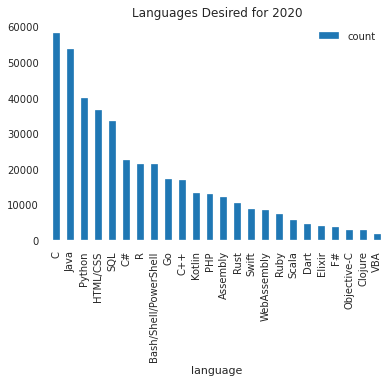

In [100]:
fut_lang19_df.set_index('language', inplace=False)
fut_lang19_df.plot(kind = 'bar')
plt.title("Languages Desired for 2020");
plt.show()

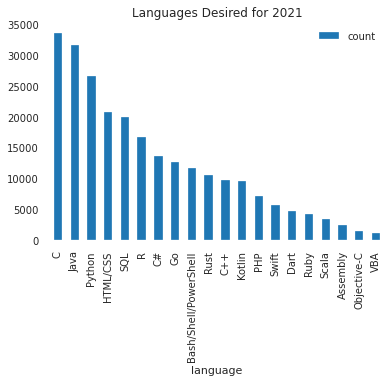

In [101]:
fut_lang20_df.set_index('language', inplace=False)
fut_lang20_df.plot(kind = 'bar')
plt.title("Languages Desired for 2021");
plt.show()

Based on the graphs above, it can be seen that most people would like to learn languages from the top 10 list of previous graphs (Current Language usage). The language Go is also one of the top 10 desired language for 2021

### 2. Has the deciding factor 'Remote Work / Work from home' has increased over the years and due to the pandemic?

In [110]:
possible_vals = ['Diversity of the company or organization', 'Languages, frameworks, and other technologies I’d be working with', 'Industry that I’d be working in', 'How widely used or impactful my work output would be',
                 'Specific department or team I’d be working on', 'Flex time or a flexible schedule', 'Remote work options', 'Financial performance or funding status of the company or organization',
                 'Office environment or company culture', 'Opportunities for professional development']

In [202]:
job_factors = new_df_s02019_pub['JobFactors'].value_counts().reset_index()
job_factors.rename(columns={'index': 'job_factors', 'JobFactors': 'count'}, inplace=True)
print(job_factors.head())
job_factors19_df = total_count(job_factors, 'job_factors', 'count', possible_vals)

                                                                                                                                          job_factors  \
0  Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development   
1  Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Flex time or a flexible schedule             
2  Languages, frameworks, and other technologies I'd be working with;Remote work options;Flex time or a flexible schedule                               
3  Office environment or company culture;Opportunities for professional development;Flex time or a flexible schedule                                    
4  Languages, frameworks, and other technologies I'd be working with;Opportunities for professional development;Flex time or a flexible schedule        

   count  
0  4992   
1  4937   
2  4710   
3  3321   
4  3248   


In [112]:
job_factors19_df.head()

,job_factors,count
5,Office environment or company culture,38478
2,Flex time or a flexible schedule,36200
6,Opportunities for professional development,34533
3,Remote work options,25176
1,How widely used or impactful my work output would be,18637


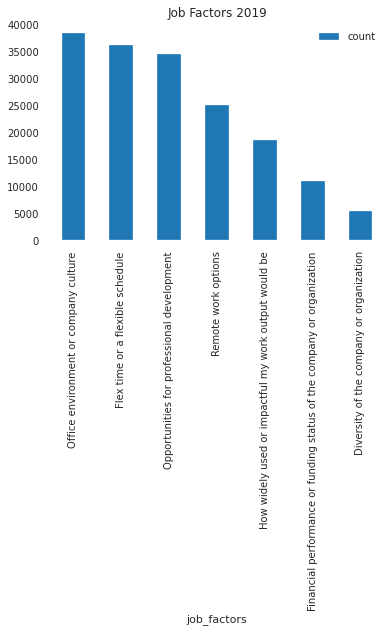

In [113]:
job_factors19_df.set_index('job_factors', inplace=False)
job_factors19_df.plot(kind = 'bar')
plt.title("Job Factors 2019");
plt.show()

In [174]:
job_factors = new_df_s02020_pub['JobFactors'].value_counts().reset_index()
job_factors.rename(columns={'index': 'job_factors', 'JobFactors': 'count'}, inplace=True)
print(job_factors.head())
job_factors20_df = total_count(job_factors, 'job_factors', 'count', possible_vals)

                                                                                                                                          job_factors  \
0  Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                               
1  Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development   
2  Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture             
3  Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development        
4  Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development                                    

   count  
0  2777   
1  2570   
2  2508   
3  1666   
4  1650   


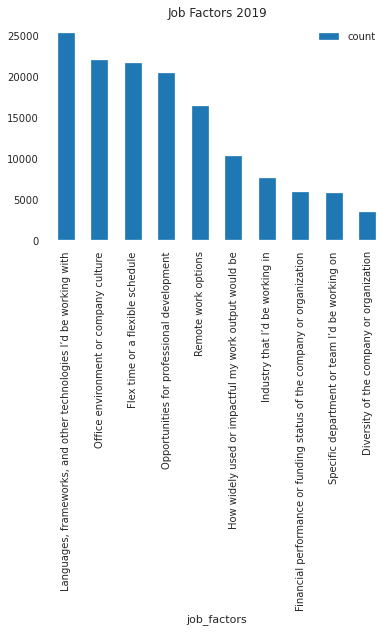

In [159]:
job_factors20_df.set_index('job_factors', inplace=False)
job_factors20_df.plot(kind = 'bar')
plt.title("Job Factors 2019");
plt.show()

In [199]:
deno = new_df_s02019_pub.shape[0]
counts = job_factors19_df['count'].max()
max_prop = counts / deno
print(max_prop)
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

0.43290618003442727


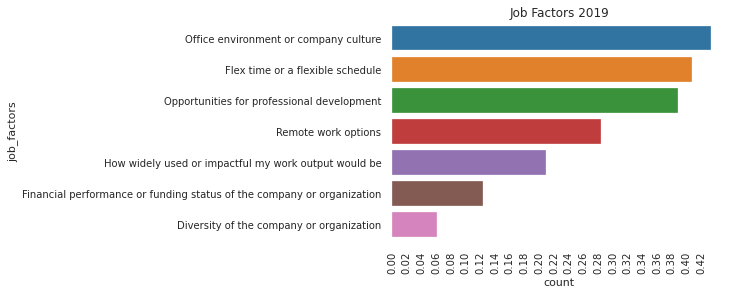

In [203]:
plt.title("Job Factors 2019");
sns.barplot(data = job_factors19_df,x='count', y = 'job_factors')
plt.xticks(tick_props*new_df_s02019_pub.shape[0], tick_names, rotation=90);

In [149]:
deno = new_df_s02020_pub.shape[0]
counts = job_factors20_df['count'].max()
max_prop = counts / deno
print(max_prop)
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

0.39301282946277594


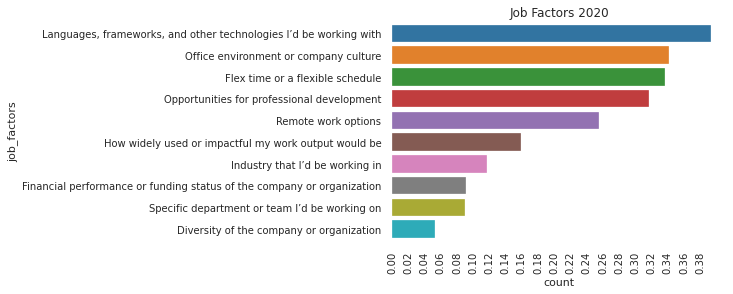

In [198]:
plt.title("Job Factors 2020");
sns.barplot(data = job_factors20_df,x='count', y = 'job_factors')
plt.xticks(tick_props*new_df_s02020_pub.shape[0], tick_names, rotation=90);

From the graphs above, it seems like the job factor 'Remote Work Options' was decreased by around 2% (from 28% to 26%) in the year 2020.

### 3. When did most people write their first line of code?

In [205]:
age1st_code = new_df_s02019_pub['Age1stCode'].value_counts()

In [214]:
age1st_code.head()

15    8681
16    8633
14    8452
18    7945
12    7735
Name: Age1stCode, dtype: int64

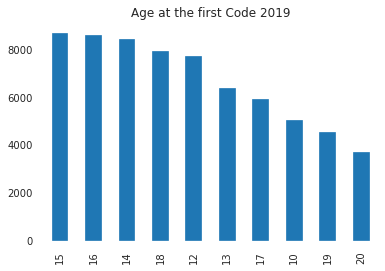

In [339]:
plt.title("Age at the first Code 2019");
age1st_code.head(10).plot(kind='bar')

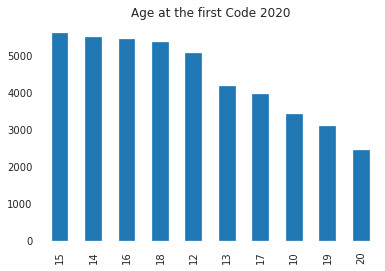

In [341]:
age1st_code20 = new_df_s02020_pub['Age1stCode'].value_counts()
plt.title("Age at the first Code 2020");
age1st_code20.head(10).plot(kind='bar')

It can seen from the graphs (they follow almost the same pattern [excpet 14 and 16]) that most people during their teenage years (13-19 years) write their first line of code and there are people who started coding well early in life (at the age of 12).

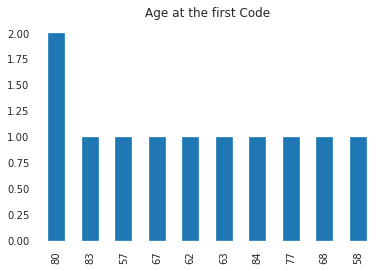

In [219]:
plt.title("Age at the first Code");
age1st_code.tail(10).plot(kind='bar')

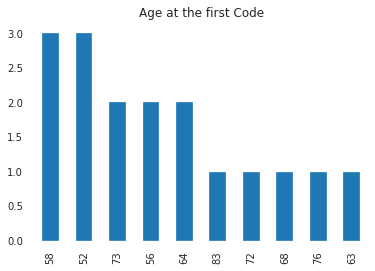

In [342]:
plt.title("Age at the first Code");
age1st_code20.tail(10).plot(kind='bar')

It can seen from the above code that very less people write their first code after mid 50s. But Kudos to them for starting a new hobby/passion/job in life :)

### 4. Which group of people use stackoverflow for their work the most?


In [265]:
new_df_s02020_pub[['YearsCode', 'YearsCodePro', 'SOVisitFreq']].head()

,YearsCode,YearsCodePro,SOVisitFreq
0,36,27,Multiple times per day
1,7,4,Multiple times per day
2,4,NaN,Daily or almost daily
3,7,4,Multiple times per day
4,15,8,A few times per month or weekly


In [343]:
#changing More than 50 years to 51
new_df_s02019_pub['YearsCodePro'] = np.where(new_df_s02019_pub.YearsCodePro == 'More than 50 years', '51', new_df_s02019_pub.YearsCodePro)
new_df_s02020_pub['YearsCodePro'] = np.where(new_df_s02020_pub.YearsCodePro == 'More than 50 years', '51', new_df_s02020_pub.YearsCodePro)

In [344]:
#changing Less than 1 year to 0
new_df_s02019_pub['YearsCodePro'] = np.where(new_df_s02019_pub.YearsCodePro == 'Less than 1 year', '0', new_df_s02019_pub.YearsCodePro)
new_df_s02020_pub['YearsCodePro'] = np.where(new_df_s02020_pub.YearsCodePro == 'Less than 1 year', '0', new_df_s02020_pub.YearsCodePro)

In [345]:
new_df_s02020_pub['YearsCodePro'] = new_df_s02020_pub['YearsCodePro'].astype('float')
new_df_s02019_pub['YearsCodePro'] = new_df_s02019_pub['YearsCodePro'].astype('float')

In [346]:
new_df_s02019_pub[['YearsCodePro', 'SOVisitFreq']].groupby(['SOVisitFreq'])[['YearsCodePro']].mean()

,YearsCodePro
SOVisitFreq,
A few times per month or weekly,9.701354
A few times per week,8.750617
Daily or almost daily,7.852222
I have never visited Stack Overflow (before today),10.761905
Less than once per month or monthly,10.924579
Multiple times per day,7.298990


In [347]:
new_df_s02020_pub[['YearsCodePro', 'SOVisitFreq']].groupby(['SOVisitFreq'])[['YearsCodePro']].mean()

,YearsCodePro
SOVisitFreq,
A few times per month or weekly,10.428080
A few times per week,9.301477
Daily or almost daily,8.035028
I have never visited Stack Overflow (before today),7.647059
Less than once per month or monthly,12.071503
Multiple times per day,7.700826


The above charts show that people with increasing coding experience over the years visit stackoverflow less and people starting their careers do it Mulitple times a day (this is as expected).

### 5.What factors associate with high salary?

In [296]:
dev_salary = df_s02019_pub.loc[:,['DevType','ConvertedComp']].dropna()
dev_salary.head()

,DevType,ConvertedComp
2,"Designer;Developer, back-end;Developer, front-end;Developer, full-stack",8820.0
3,"Developer, full-stack",61000.0
5,"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Engineer, data",366420.0
8,"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, QA or test;DevOps specialist",95179.0
9,"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, game or graphics;Educator",13293.0


In [ ]:
possible_vals = ['Engineering manager', 'Engineer, site reliability', 'Senior executive/VP', 'DevOps specialist', 'Data scientist or machine learning specialist',
                'Product manager', 'Engineer, data', 'Developer, full-stack', 'Data or business analyst', 'Developer, embedded applications or devices', 'Marketing or sales professional',
                'Developer, desktop or enterprise applications', 'Educator', 'System administrator', 'Developer, back-end', 'Developer, front-end', 'Database administrator',
                'Developer, game or graphics', 'Developer, QA or test', 'Designer', 'Scientist', 'Developer, mobile', 'Academic researcher', 'Student']

In [303]:
new_dev_salary = pd.DataFrame(columns = ['DevType','ConvertedComp'])
for index, row in dev_salary.iterrows():
    columns = row['DevType'].split(';')
    for col in columns:
        new_dev_salary.loc[len(new_dev_salary)] = [col, row['ConvertedComp']]

In [304]:
new_dev_salary.head(10)

,DevType,ConvertedComp
0,Designer,8820.0
1,"Developer, back-end",8820.0
2,"Developer, front-end",8820.0
3,"Developer, full-stack",8820.0
4,"Developer, full-stack",61000.0
5,Data or business analyst,366420.0
6,Data scientist or machine learning specialist,366420.0
7,Database administrator,366420.0
8,"Engineer, data",366420.0
9,Database administrator,95179.0


In [313]:
new_dev_salary_group = new_dev_salary.groupby('DevType').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
new_dev_salary_group

,DevType,ConvertedComp
17,Engineering manager,95000.0
21,Senior executive/VP,91752.0
16,"Engineer, site reliability",85000.0
5,DevOps specialist,71036.0
15,"Engineer, data",66453.0
2,Data scientist or machine learning specialist,61071.0
19,Product manager,60000.0
1,Data or business analyst,59004.0
11,"Developer, full-stack",57425.5
9,"Developer, embedded applications or devices",57287.0


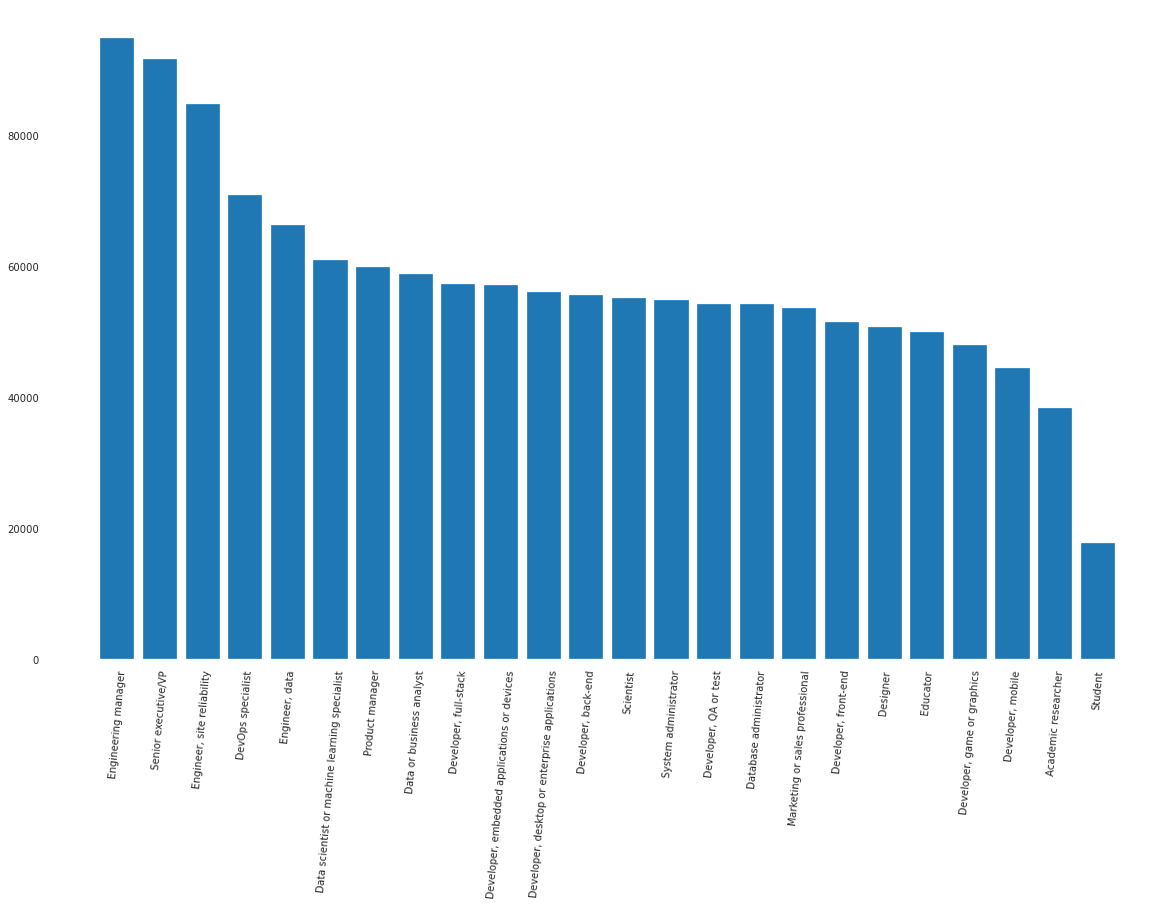

In [317]:
plt.figure(figsize=(20,12))
y_pos = np.arange(new_dev_salary_group.shape[0])
plt.bar(y_pos, new_dev_salary_group['ConvertedComp'])
plt.xticks(y_pos,new_dev_salary_group['DevType'],rotation=85);

In [318]:
org_salary = df_s02019_pub.loc[:,['OrgSize','ConvertedComp']].dropna()
org_salary.head()

,OrgSize,ConvertedComp
2,100 to 499 employees,8820.0
3,100 to 499 employees,61000.0
8,10 to 19 employees,95179.0
9,"10,000 or more employees",13293.0
12,10 to 19 employees,90000.0


In [321]:
org_size_salary_group = org_salary.groupby('OrgSize').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
org_size_salary_group

,OrgSize,ConvertedComp
2,"10,000 or more employees",82188.0
6,"5,000 to 9,999 employees",68745.0
0,"1,000 to 4,999 employees",66000.0
7,500 to 999 employees,60722.5
8,"Just me - I am a freelancer, sole proprietor, etc.",60000.0
3,100 to 499 employees,59292.0
5,20 to 99 employees,50000.0
1,10 to 19 employees,41871.0
4,2-9 employees,37810.0


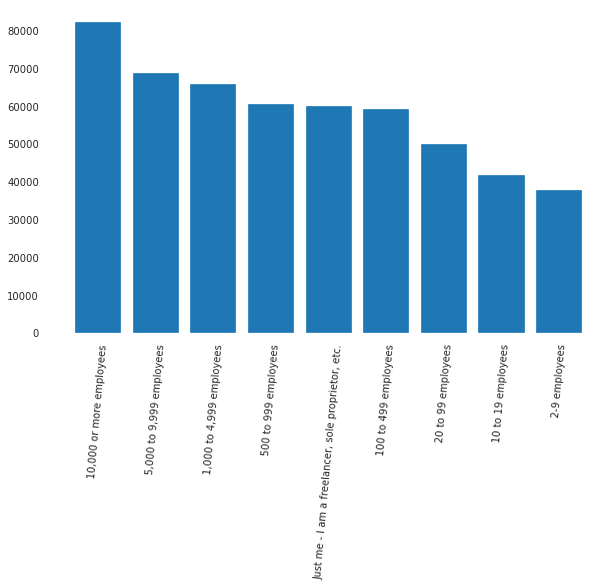

In [324]:
plt.figure(figsize=(10,6))
y_pos = np.arange(org_size_salary_group.shape[0])
plt.bar(y_pos, org_size_salary_group['ConvertedComp'])
plt.xticks(y_pos,org_size_salary_group['OrgSize'],rotation=85);

In [325]:
edlevel_salary = df_s02019_pub.loc[:,['EdLevel','ConvertedComp']].dropna()
edlevel_salary.head()

,EdLevel,ConvertedComp
2,"Bachelor’s degree (BA, BS, B.Eng., etc.)",8820.0
3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61000.0
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",366420.0
8,Some college/university study without earning a degree,95179.0
9,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",13293.0


In [326]:
edlevel_salary_group = edlevel_salary.groupby('EdLevel').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
edlevel_salary_group

,EdLevel,ConvertedComp
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",81960.0
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",60000.0
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",57744.0
0,Associate degree,56092.5
2,I never completed any formal education,53562.0
8,Some college/university study without earning a degree,52476.0
7,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",37128.0
5,Primary/elementary school,34368.0
6,"Professional degree (JD, MD, etc.)",32998.0


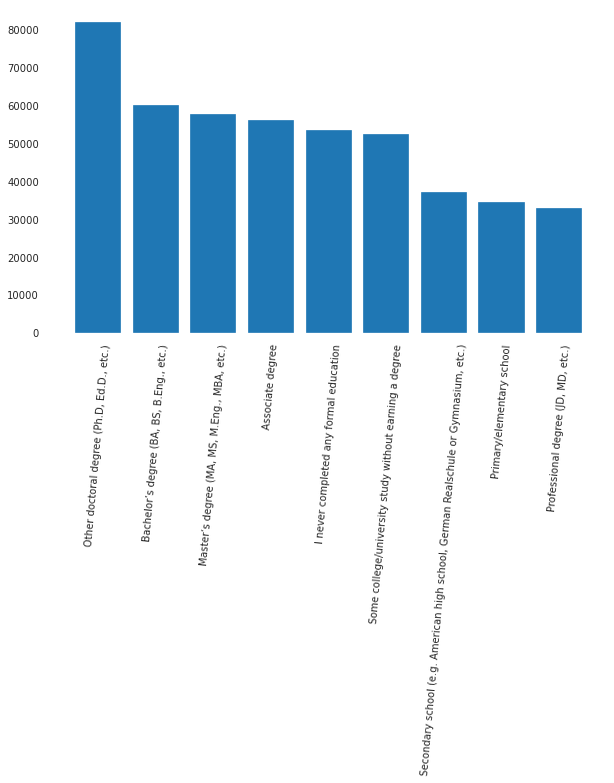

In [328]:
plt.figure(figsize=(10,6))
y_pos = np.arange(edlevel_salary_group.shape[0])
plt.bar(y_pos, edlevel_salary_group['ConvertedComp'])
plt.xticks(y_pos,edlevel_salary_group['EdLevel'],rotation=85);

2020 Data

In [329]:
dev_salary = df_s02020_pub.loc[:,['DevType','ConvertedComp']].dropna()
dev_salary.head()

,DevType,ConvertedComp
7,"Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics",116000.0
9,"Database administrator;Developer, full-stack;Developer, mobile",32315.0
10,"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end",40070.0
11,"Designer;Developer, front-end",14268.0
12,"Designer;Developer, back-end",38916.0


In [330]:
new_dev_salary = pd.DataFrame(columns = ['DevType','ConvertedComp'])
for index, row in dev_salary.iterrows():
    columns = row['DevType'].split(';')
    for col in columns:
        new_dev_salary.loc[len(new_dev_salary)] = [col, row['ConvertedComp']]

In [331]:
new_dev_salary.head(10)

,DevType,ConvertedComp
0,"Developer, back-end",116000.0
1,"Developer, desktop or enterprise applications",116000.0
2,"Developer, game or graphics",116000.0
3,Database administrator,32315.0
4,"Developer, full-stack",32315.0
5,"Developer, mobile",32315.0
6,"Developer, back-end",40070.0
7,"Developer, desktop or enterprise applications",40070.0
8,"Developer, embedded applications or devices",40070.0
9,"Developer, front-end",40070.0


In [332]:
new_dev_salary_group = new_dev_salary.groupby('DevType').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
new_dev_salary_group

,DevType,ConvertedComp
17,Engineering manager,91883.0
21,Senior executive/VP,90000.0
16,"Engineer, site reliability",80000.0
5,DevOps specialist,68068.0
15,"Engineer, data",64859.0
19,Product manager,59000.0
2,Data scientist or machine learning specialist,58000.0
20,Scientist,56755.5
9,"Developer, embedded applications or devices",56579.5
8,"Developer, desktop or enterprise applications",55582.0


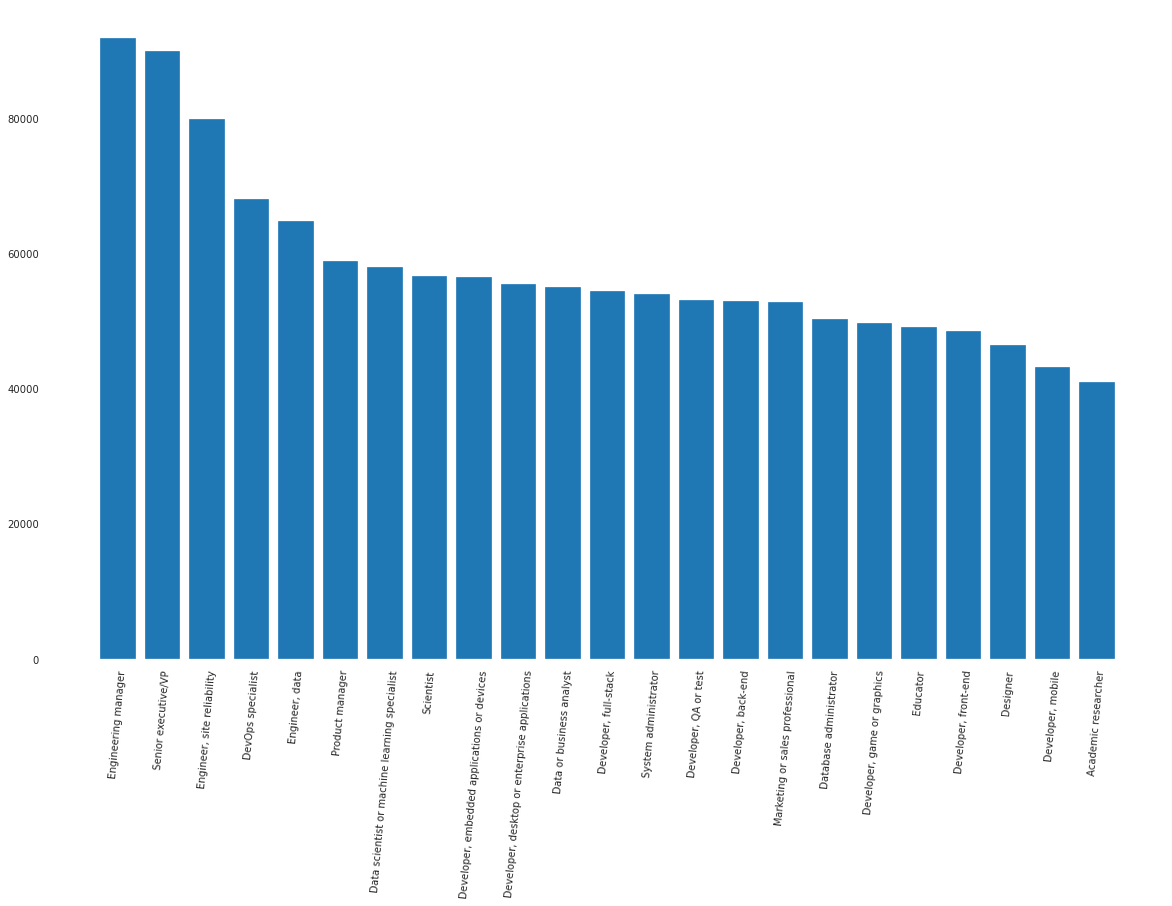

In [333]:
plt.figure(figsize=(20,12))
y_pos = np.arange(new_dev_salary_group.shape[0])
plt.bar(y_pos, new_dev_salary_group['ConvertedComp'])
plt.xticks(y_pos,new_dev_salary_group['DevType'],rotation=85);

In [334]:
org_salary = df_s02020_pub.loc[:,['OrgSize','ConvertedComp']].dropna()
org_salary.head()

,OrgSize,ConvertedComp
7,20 to 99 employees,116000.0
9,2 to 9 employees,32315.0
10,"10,000 or more employees",40070.0
11,2 to 9 employees,14268.0
12,2 to 9 employees,38916.0


In [335]:
org_size_salary_group = org_salary.groupby('OrgSize').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
org_size_salary_group

,OrgSize,ConvertedComp
2,"10,000 or more employees",77556.0
6,"5,000 to 9,999 employees",67524.0
0,"1,000 to 4,999 employees",66540.0
3,100 to 499 employees,55847.0
7,500 to 999 employees,54608.5
8,"Just me - I am a freelancer, sole proprietor, etc.",50000.0
5,20 to 99 employees,48560.0
1,10 to 19 employees,37834.0
4,2 to 9 employees,35028.0


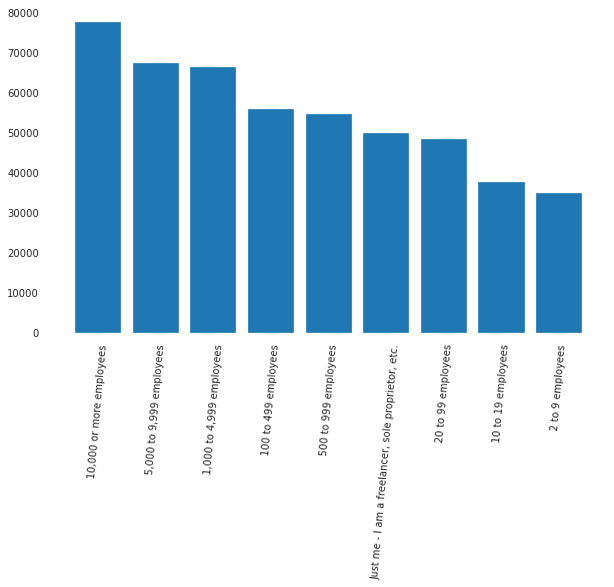

In [336]:
plt.figure(figsize=(10,6))
y_pos = np.arange(org_size_salary_group.shape[0])
plt.bar(y_pos, org_size_salary_group['ConvertedComp'])
plt.xticks(y_pos,org_size_salary_group['OrgSize'],rotation=85);

In [337]:
edlevel_salary = df_s02020_pub.loc[:,['EdLevel','ConvertedComp']].dropna()
edlevel_salary.head()

,EdLevel,ConvertedComp
7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",116000.0
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",32315.0
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",40070.0
11,Some college/university study without earning a degree,14268.0
12,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",38916.0


In [ ]:
edlevel_salary_group = edlevel_salary.groupby('EdLevel').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
edlevel_salary_group

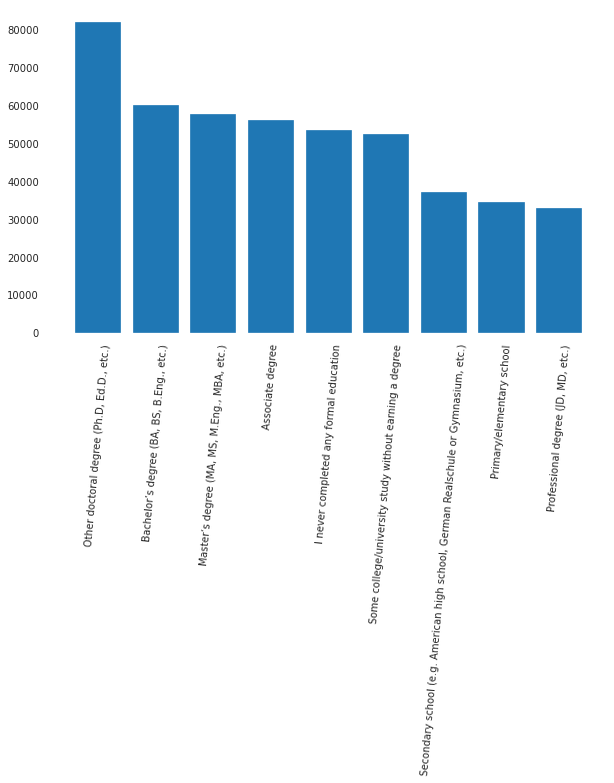

In [338]:
plt.figure(figsize=(10,6))
y_pos = np.arange(edlevel_salary_group.shape[0])
plt.bar(y_pos, edlevel_salary_group['ConvertedComp'])
plt.xticks(y_pos,edlevel_salary_group['EdLevel'],rotation=85);